In [ ]:
#Create initial database from csv
import csv, sqlite3

con = sqlite3.connect("db/db_tweets.db")
cur = con.cursor()
cur.execute("DROP TABLE IF EXISTS tweets;")
cur.execute("CREATE TABLE IF NOT EXISTS tweets (party, handle, tweet);")

with open('original_data/ExtractedTweets.csv','rt',encoding='utf-8') as fin:
    dr = csv.DictReader(fin)
    to_db = [(i['Party'], i['Handle'], i['Tweet']) for i in dr]

cur.executemany("INSERT INTO tweets (party, handle, tweet) VALUES (?, ?, ?);", to_db)
con.commit()
con.close()

In [ ]:
# Print tweets from db
# Just for testing

# import sqlite3

# conn = sqlite3.connect('db/db_tweets.db')
# cur = conn.cursor()

# def get_posts(x):
#     cur.execute("SELECT * FROM tweets")
#     return cur.fetchmany(x)
    
# def print_tweet(t):
#     print('\n@{} [{}]\n-----\n{}\n'.format(t[1], t[0], t[2]))

# for tweet in get_posts(10):
#     print_tweet(tweet)

# conn.close()

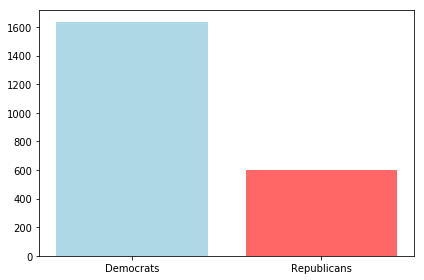

In [17]:
# Print tweets from db
import sqlite3
import matplotlib.pyplot as plt
import re

conn = sqlite3.connect('db/db_tweets.db')
cur = conn.cursor()

def plot_mud(mud_d, mud_r):
    fig, ax = plt.subplots()
    ax.bar(("Democrats","Republicans"),(mud_d,mud_r),color=("lightblue","#ff6666"))
    ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
    fig.tight_layout()
    plt.show()

def analyze_mud(plot):
#     print("-"*30)
#     print("DEMS")
#     print("-"*30)
    cur.execute("SELECT tweet FROM tweets WHERE party='Democrat'")
    mud_d = get_mud(cur.fetchall(), True)
#     print("\n"*100)
#     print("-"*30)
#     print("REPS")
#     print("-"*30)
    cur.execute("SELECT tweet FROM tweets WHERE party='Republican'")
    mud_r = get_mud(cur.fetchall(), False)
    #print("\n\n---RESULTS---\n\nDEM MUD: {}\nREP MUD: {}".format(mud_d, mud_r))
    if(plot):
        plot_mud(mud_d,mud_r)
    
def get_mud(tweets, dem):
    regex = r""
    result = 0
    if dem:
        regex = r"(?!\brepublic\b)\brepub+|\bgop\b|\bconservative+|\bright\w*wing\b"
    else:
        regex = r"(?!\bdemarest)(?!\bdemocracy\b)\bdem+|\bdnc\b|\bliberal+|\blibs+|\bleft\w*wing\b"
    for tweet in tweets:
        if(re.search(regex, tweet[0], re.I)):
            #print("\n{}\n".format(tweet[0]))
            result+=1
    return result

analyze_mud(True)

conn.close()

In [ ]:
# Print tweets from db
import sqlite3
import re

conn = sqlite3.connect('db/db_tweets.db')
cur = conn.cursor()

def analyze_words(x):
    print("-"*30)
    print("DEMS")
    print("-"*30)
    cur.execute("SELECT tweet FROM tweets WHERE party='Democrat'")
    analyze(cur.fetchmany(x))
    print("\n"*3)
    print("-"*30)
    print("REPS")
    print("-"*30)
    cur.execute("SELECT tweet FROM tweets WHERE party='Republican'")
    analyze(cur.fetchmany(x))
    
def filter_word(word):
    wordFilterList = ['the', 'a', 'an', 'is', 'and', 'to', 'for', 'that', 'of', 'in', 'with']
    if not word.lower() in wordFilterList:
        return True
    
def analyze(tweets):
#     wordlist = []
#     for tweet in tweets:
#         wordlist.extend(tweet[0].split())

#     wordfreq = []
#     for w in wordlist:
#         wordfreq.append(wordlist.count(w))

#     print("List\n" + str(wordlist) + "\n")
#     print("Frequencies\n" + str(wordfreq) + "\n")
#     print("Word Frequencies\n" + str(list(zip(wordlist, wordfreq))))

    dWords = dict()
    for tweet in tweets:
        for word in tweet[0].split():
            if not filter_word(word):
                continue
            elif word in dWords:
                dWords[word] += 1
            else:
                dWords[word] = 1
    
    d_view = [ (v,k) for k,v in dWords.items() ]
    d_view.sort(reverse=True) # natively sort tuples by first element
    
    index = 0
    for v,k in d_view:
        index+=1
        if index > 10:
            break
        print("{} - {}: {}".format(index,k,v))
#     print(dWords)

analyze_words(20000)

conn.close()